<a href="https://colab.research.google.com/github/syedhaiderrabbass/ML_project/blob/master/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [0]:
data=pd.read_csv("/content/Multi_Label_dataset/train.csv")
df=data.copy()

In [28]:
!pip install tensorflow-gpu==2.0.0-rc0

In [0]:
import tensorflow as tf
from tensorflow.keras import Sequential

In [0]:
from tensorflow.keras.layers import Flatten, Dense ,Dropout,BatchNormalization,Conv2D,MaxPool2D

In [0]:
#pre-processing libraries
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

In [32]:
print(tf.__version__)

2.0.0-rc0


In [0]:
#supporting liabraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [0]:
#!git clone https://github.com/laxmimerit/Multi-Label-Image-Classification-on-Movies-Poster-using-CNN.git

In [0]:
# data=pd.read_csv('/content/Multi-Label-Image-Classification-on-Movies-Poster-using-CNN/train.csv')
# data.shape

In [35]:
data.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [36]:
img_width = 350
img_height = 350

x=[]

for i in tqdm(range(data.shape[0])):
  path = '/content/Multi_Label_dataset/Images/' + data['Id'][i] + '.jpg'
  img = image.load_img(path, target_size=(img_width,img_height, 3))
  img = image.img_to_array(img)
  img = img/255.0
  x.append(img)
x = np.array(x)






100%|██████████| 7254/7254 [00:25<00:00, 283.04it/s]


In [37]:
x.shape

(7254, 350, 350, 3)

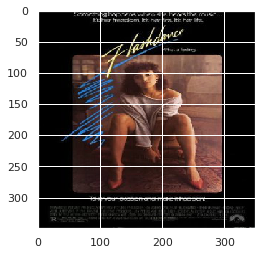

In [38]:
plt.imshow(x[1])

In [39]:
data['Genre'][1]

"['Drama', 'Romance', 'Music']"

In [40]:
y=data.drop(['Id', 'Genre'], axis = 1)
y = y.to_numpy()
y.shape

(7254, 25)

In [0]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0 , test_size = 0.15)

Building CNN model 

In [0]:
model = Sequential()
model.add(Conv2D(16,(3,3),activation = 'relu',input_shape= x_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))


model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))


model = Sequential()
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))


model = Sequential()
model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))

#These are fully conected layers
#1st Fully connected Layer
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


#2nd Fully connected Layer
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

#Final outPut layer
model.add(Dense(25, activation='sigmoid'))


In [0]:
model.summary()

ValueError: ignored

In [0]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', matrics=['accuracy'])

In [0]:
history = model.fit(x_train,y_train, epochs =5, validation_data=(x_test,y_test))

Train on 6165 samples, validate on 1089 samples
Epoch 1/5
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
def plot_learningCurve(history,epoch):
  epoch_range = range(1,epoch+1))
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train','val'], loc = 'upper left')
  plt.show()

  #plot training and validation loss values or error valu which were required

  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train','val'], loc = 'upper left')
  plt.show()

In [0]:
# from zipfile import zipFile
# file_name = 'Multi_Label_dataset.zip'

# with zipFile(file_name,'r') as zip:
#   zip.extractall()
#   print('Done')

ImportError: ignored

In [0]:
!unzip /content/Multi_Label_dataset.zip

Archive:  /content/Multi_Label_dataset.zip
   creating: Multi_Label_dataset/.ipynb_checkpoints/
  inflating: Multi_Label_dataset/.ipynb_checkpoints/Project-checkpoint.ipynb  
   creating: Multi_Label_dataset/Images/
  inflating: Multi_Label_dataset/Images/tt0084058.jpg  
  inflating: Multi_Label_dataset/Images/tt0084867.jpg  
  inflating: Multi_Label_dataset/Images/tt0085121.jpg  
  inflating: Multi_Label_dataset/Images/tt0085154.jpg  
  inflating: Multi_Label_dataset/Images/tt0085159.jpg  
  inflating: Multi_Label_dataset/Images/tt0085208.jpg  
  inflating: Multi_Label_dataset/Images/tt0085236.jpg  
  inflating: Multi_Label_dataset/Images/tt0085244.jpg  
  inflating: Multi_Label_dataset/Images/tt0085248.jpg  
  inflating: Multi_Label_dataset/Images/tt0085255.jpg  
  inflating: Multi_Label_dataset/Images/tt0085271.jpg  
  inflating: Multi_Label_dataset/Images/tt0085276.jpg  
  inflating: Multi_Label_dataset/Images/tt0085318.jpg  
  inflating: Multi_Label_dataset/Images/tt0085320.jpg  


In [0]:
plot_learningCurve(history,5)

Testing of a model

In [0]:
  img = image.load_img('end_game_poster.jpg', target_size=(img_width,img_height, 3))
  plt.imshow(img)
  img = image.img_to_array(img)
  img = img/255.0
  x.append(img)

  img = img.reshape(1, img_width, img_height, 3)

  classes = data.columns[2:]
  print(classes)
  y_prob = model.predict(img)
  # y_prob

  top3 = np.argsort(y_prob[0])[:-4,-1]
  # top3

for i in range(3):
  print(classes[top3[i]])
  #y_prob[top3[i]]